




# <center> Scott Zuehlke Homework 1 </center>
#### <center> This homework assignment was done in large partnership with Renee Murray, who was a significant help in the Python coding of the homework assignments.</center>

## <center>  Written on a Mac, for a Mac </center>


## HW1.0.0. 
### Define big data. Provide an example of a big data problem in your domain of expertise. 

#### _Big data is a generic term to represent data sets that are so large, or possibly so complex, that traditional methods of processing and analysis are inadequate.  While the cutoff of what represents "big data" is relative to a company and its technological capabilities, there is a tipping point where basic methods (SQL, for example) cannot process the large amounts of data in a sufficient amount of time.  The other side of that tipping point is what is referred to as "big data."_

#### _In my domain of retail and e-commerce, a perfect example of "big data" would be the data generated by our Target.com website.  A specific use case for this data is the Target.com Personalization Engine.  The Personalization Engine runs in a fraction of a second and pulls data from a Hadoop environment to create a "people with similar purchase history have also bought..." type recommendation.  The amount of data to process would take days with a traditional processing technique, but through Hadoop and Spark algorithms, millions of records can be processed almost instantaneously._


### What is a race condition in the context of parallel computation? Give an example.

#### _A race condition, in the context of parallel computation, is a situation where more than one process reaches the same variable, file, or data set concurrently and alters the final result._

#### _A real world example would be a deposit/withdrawal at a bank.  If a customer has 10 dollars in their account on Monday, deposits 25 on Tuesday and tries to withdraw 20 on Wednesday, the withdrawal's success would depend on the deposit happeing BEFORE the withdrawal processes.  Below is some pseudocode to illustrate._
```
class BankAccount:
    
    def __init__(self, balance, deposit, withdraw):    
        self.balance = balance
        self.deposit = deposit
        self.withdraw = withdraw
    
    def ProcessDeposit(balance, deposit):
        new_balance = balance + deposit_amt
        yield new_balance
        
        
    def ProcessWithdrawal(balance, withdraw):
        
        if new_balance >= withdraw then:
            new_balance = balance + deposit_amt
            yield new_balance 
        else:
            yield "Withdrawal would cause overdraft."
```
            
####  _Ideally, if a person were to start with an initial balance of 10 dollars, deposits 25 and then withdraws 20, the ending balance should be 10+25-20 = 15.  However, if the withdrawal were to post first, then balance would actually go negative, i.e. 10 - 20 + 25._ Mathematically, this would yield the same result of 15, but in the example above, since the new_balance would be less than the withdrawal, it would fail to post and yield outcome,"Withdrawal would cause overdraft."_
        


## What is MapReduce?

#### _MapReduce is a programming algorithm for processing, and generating, large data sets.  A mapper is created to apply a specific algorithm to each of a smaller piece of the original data spread out across multiple computers or nodes, creates a key-value pair with the resulting output from each defined key, and then a reducer will merge the key value pairs to create a single output, which is the desired result of analysis on the larger, initial data set._



## How does it differ from Hadoop?

#### _MapReduce is a "divide and conquer" algorithm that allows for processing of "big data" by splitting chunks across multiple nodes or clusters.  Hadoop is an infrastructure that utilizes MapReduce to process large, or unstructured/complex, data sets._

# HW1.0.1 

## Which programming paradigm is Hadoop based on? Explain and give a simple example of functional programming in raw python code and show the code running. E.g., in raw python find the average length of a string in and of strings using a python "map-reduce" (functional programming) job. Alternatively, you can do this in python Hadoop Streaming.   

#### _Hadoop is based on the MapReduce programming paradigm, which is based on functional programming.  So, by extension, it could be said that Hadoop is, actually, based on the functional programming._

### **_The below code calculates the average string length in a string of strings.  The provided string was provided in the original homework assignment._**

In [1]:
def stringlength(string):
    return len(string)

def numelements(string):
    return len(string.split())
 
strings = ["str1", "string2", "w261", "MAchine learning at SCALE"]
stringlengthmap = map(stringlength, strings)

import functools
print "The input string ", strings, "has an average length of ", 
functools.reduce(lambda x, y: x + y / float(len(stringlengthmap)), stringlengthmap, 0)

The input string  ['str1', 'string2', 'w261', 'MAchine learning at SCALE'] has an average length of 

10.0

### **_The below code is now to prove that the code does work, by providing a different, custom string with different string lengths.  _**

In [2]:
def stringlength(string):
    return len(string)

def numelements(string):
    return len(string.split())
 
strings = ["Really hope", "this assignment", "ends better than", "it started!"]
stringlengthmap = map(stringlength, strings)

import functools
print "The input string ", strings, "has an average length of ", 
functools.reduce(lambda x, y: x + y / float(len(stringlengthmap)), stringlengthmap, 0)

The input string  ['Really hope', 'this assignment', 'ends better than', 'it started!'] has an average length of 

13.25

# HW1.1 Cross fold validation 

## What is cross validation (in partiticular 10-fold cross validation)?

#### _Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.  10-fold cross validation is partitioning the original sample into 10 partitions; 9 to train and one to test.  Here's a basic outline of a 10 fold cross validation on a modeling data set:_

   * Partition data into, approximately, n/10 where n is the size of the data set.  (If the data set has 1000 records, there would be roughly 1000/10 = 100 data points in each partition).

   * Train a model on 9 of the 10 partitions, holding the last for validation.

   * Repeat 9 times, with each iteration a different holding partition for validation.

   * Calculate a desired metric for the 10 validations (MSE, RMSE, MAPE, etc.)

# Info for the rest of the assignment: 

===== SPAM Dataset 
In the remainder of this assignment you will produce a spam filter
that is backed by a multinomial naive Bayes classifier  (see http://nlp.stanford.edu/IR-book/html/htmledition/properties-of-naive-bayes-1.html).

For the sake of this assignment we will focus on the basic construction 
of the parallelized classifier, and not consider its validation or calibration,
and so you will have the classifier operate on its own training data (unlike a 
field application where one would use non-overlapping subsets for training, validation and testing).

The data you will use is a curated subset of the Enron email corpus
(whose details you may find in the file enronemail_README.txt  in the directory surrounding these instructions).

NOTE: please use the subject field and the body field for all your Naive Bayes modeling. 

NOTE: This SPAM/HAM dataset for HW1 contains 100 records from the Enron SPAM/HAM corpus. Please limit your study to this unless otherwise instructed. There are about 93,000 emails in the original SPAM/HAM corpus. There are several versions of the SPAM/HAM corpus. Other Enron-Spam datasets are available from http://www.aueb.gr/users/ion/data/enron-spam/index.html and http://www.aueb.gr/users/ion/publications.html in both raw and pre-processed form. 

Doing some exploratory data analysis you will see (with this very small dataset) the following:
> wc -l enronemail_1h.txt  #100 email records
     100 enronemail_1h.txt
> cut -f2 -d$'\t' enronemail_1h.txt|wc  #extract second field which is SPAM flag
     101     394    3999
JAMES-SHANAHANs-Desktop-Pro-2:HW1-Questions jshanahan$ cut -f2 -d$'\t' enronemail_1h.txt|head
0
0
0
0
0
0
0
0
1
1

> head -n 100 enronemail_1h.txt|tail -1|less 

### An example SPAM email record
018.2001-07-13.SA_and_HP       1        [ilug] we need your assistance to invest in your country        dear sir/madam,  i am well confident of your capability to assist me in  a transaction for mutual benefit of both parties, ie  (me and you) i am also believing that you will not  expose or betray the trust and confidence i am about  to establish with you. i have decided to contact you  with greatest delight and personal respect.  well, i am victor sankoh, son to mr. foday  sankoh  who was arrested by the ecomog peace keeping force  months ago in my country sierra leone. ….

## HW1.2 

### WORDCOUNT
Using the Enron dataset and Hadoop MapReduce streaming (or MRJob), write the mapper/reducer job that  will determine the word count (number of occurrences) of each white-space delimitted token (assume spaces, fullstops, comma as delimiters). Examine the word “assistance” and report its word count results.

 
CROSSCHECK: >grep assistance enronemail_1h.txt|cut -d$'\t' -f4| grep assistance|wc -l    
       8   
       
NOTE:  "assistance" occurs on 8 lines but how many times does the token occur? 10 times! This is the number we are looking for!

In [88]:
%%writefile WordCountHW12.py

from mrjob.job import MRJob
import re, string

class MRJobWordCount(MRJob):

    def mapper(self, _, line):
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        token = line.strip().split('\t', 2)[-1]
        token = regex.sub(' ', token.lower())
        token = re.sub( '\s+', ' ', token )
        words = token.split()

        for word in words:
            if len(word) > 1:
                yield (word, 1)

    def combiner(self, word, counts):
        yield(word, sum(counts))

    def reducer(self, word, counts):
        yield word, sum(counts)
    
if __name__ == '__main__':
    MRJobWordCount.run()

Overwriting WordCountHW12.py


In [89]:
!python WordCountHW12.py  enronemail_1h.txt

No configs found; falling back on auto-configuration
Creating temp directory /var/folders/0r/78q4n41j3dgdb6ndrr46gw3430x2wk/T/WordCountHW12.z086769.20160701.135730.277857
Running step 1 of 1...
Streaming final output from /var/folders/0r/78q4n41j3dgdb6ndrr46gw3430x2wk/T/WordCountHW12.z086769.20160701.135730.277857/output...
"00"	33
"000"	52
"001"	3
"0011"	1
"00450"	1
"0080"	1
"01"	25
"012"	4
"02"	19
"028"	1
"0281"	1
"03"	3
"036474336"	1
"04"	7
"048"	1
"05"	4
"055"	2
"06"	21
"0643"	1
"07"	10
"08"	22
"081"	2
"088889774"	1
"09"	21
"10"	44
"100"	19
"100038"	1
"1016"	1
"103"	1
"107"	1
"108"	1
"11"	15
"114427"	1
"12"	74
"120"	1
"1200"	2
"122"	1
"123"	3
"123395"	1
"124"	3
"125"	2
"126"	2
"13"	13
"134"	1
"14"	33
"146907159"	1
"148415904"	1
"1488230796"	1
"149"	1
"15"	25
"150"	1
"1500"	1
"151"	1
"1517"	1
"16"	5
"161"	1
"1687"	1
"1689"	1
"17"	19
"18"	18
"1814"	1
"1848"	1
"1864"	1
"19"	9
"1928"	1
"1930"	1
"1932"	1
"1933"	1
"1934"	1
"1935"	1
"1936"	1
"1938"	1
"1941"	1
"1942"	1
"1944"	1
"1945"	1
"1

#### The below will count the overall frequency of the word "assistance."  This is a modification of the code provided, which will validate the mapreduce wordcount job.

In [5]:
!grep -o assistance enronemail_1h.txt | wc -l

      10


#### The below will count the number of lines where the word "assistance" occurs.   This is exactly the code provided above.  

In [6]:
!grep assistance enronemail_1h.txt|cut -d$'\t' -f4| grep assistance|wc -l

       8


# HW1.2.1 

Using Hadoop MapReduce (or MRJob) and your wordcount job (from HW1.2) determine the top-10 occurring tokens (most frequent tokens) using a single reducer. 

##### Now that the hw121.txt file has been created and contains the data from enronemail_1h.txt in the (word, wordfrequency) format, the below will read the file back into Python as a dictionary, sort the dictionary by descending wordfrequency, and print the top 10 most frequently occurring words.

In [45]:
prevresults = {}
resultdict = [s.split('\n')[0].split('\t') for s in open("hw121.txt").readlines()]
for word, count in resultdict:
    prevresults[word] =  map(int, count.split(","))
sorted(prevresults, key=prevresults.get, reverse=True)[:10]

['the', 'to', 'and', 'of', 'you', 'in', 'your', 'ect', 'for', 'on']

##### If the desire was to have both word and frequency...

In [46]:
from collections import Counter

prevresultscounts = {}
resultdict = [s.split('\n')[0].split('\t') for s in open("hw121.txt").readlines()]
for word, statsStr in resultdict:
    prevresultscounts[word] =  map(int, statsStr.split(","))

Counter(prevresultscounts).most_common(10)

[('the', [1247]),
 ('to', [964]),
 ('and', [670]),
 ('of', [566]),
 ('you', [445]),
 ('in', [418]),
 ('your', [395]),
 ('ect', [382]),
 ('for', [374]),
 ('on', [271])]

# HW1.3: Multinomial NAIVE BAYES with NO Smoothing using a single reducer

Using the Enron data from HW1 and Hadoop MapReduce (or MRJob), write  a mapper/reducer job(s) that
   will both learn  Naive Bayes classifier and classify the Enron email messages using the learnt Naive Bayes classifier. Use all white-space delimitted tokens as independent input variables (assume spaces, fullstops, commas as delimiters). Note: for multinomial Naive Bayes, the Pr(X=“assistance”|Y=SPAM) is calculated as follows:

   the number of times “assistance” occurs in SPAM labeled documents / the number of words in documents labeled SPAM 

   E.g.,   “assistance” occurs 5 times in all of the documents Labeled SPAM, and the length in terms of the number of words in all documents labeled as SPAM (when concatenated) is 1,000. Then Pr(X=“assistance”|Y=SPAM) = 5/1000. Note this is a multinomial estimation of the class conditional for a Naive Bayes Classifier. No smoothing is needed in this HW. Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. Please pay attention to probabilites that are zero! They will need special attention. Count up how many times you need to process a zero probabilty for each class and report. 

   Report the performance of your learnt classifier in terms of misclassifcation error rate of your multinomial Naive Bayes Classifier. Plot a histogram of the  posterior probabilities (i.e., Pr(Class|Doc)) for each class over the training set. Summarize what you see. 

   Error Rate = misclassification rate with respect to a provided set (say training set in this case). It is more formally defined here:

Let DF represent the evalution set in the following:
Err(Model, DF) = |{(X, c(X)) ∈ DF : c(X) != Model(x)}|   / |DF|

Where || denotes set cardinality; c(X) denotes the class of the tuple X in DF; and Model(X) denotes the class inferred by the Model “Model”

NOTE: please assume one reducer.



In [48]:
%%writefile NaiveBayesTrainerHW1.py

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
 
from collections import defaultdict
 
from mrjob.job import MRJob
from mrjob.job import MRStep

import re, string

line_counts = dict()
word_counts = dict()

class NaiveBayesTrainer(MRJob):
 
    def __init__(self, *args, **kwargs):
        super(NaiveBayesTrainer, self).__init__(*args, **kwargs)
        
    def jobconf(self):
        orig_jobconf = super(NaiveBayesTrainer, self).jobconf()        
        custom_jobconf = {
            'mapred.reduce.tasks': '1',
        }
        combined_jobconf = orig_jobconf
        combined_jobconf.update(custom_jobconf)
        self.jobconf = combined_jobconf
        return combined_jobconf
    
     
    def configure_options(self):
        super(NaiveBayesTrainer, self).configure_options()
        self.add_passthrough_option(
            '--smoothmethod', default='nosmooth', choices=['nosmooth', 'laplace', 'jelinekmercer']
        )
        
        self.add_passthrough_option(
            '--jmlambda', default=0.3, dest='jmlambda', type='float'
        )
        
    def steps(self):
        out = [
            MRStep(
                mapper = self.mapper,
                combiner = self.combiner,
                reducer = self.reducer_pre
            )
        ]
        
        if self.options.smoothmethod == 'laplace': 
            out.append(MRStep(
                reducer = self.reducer_laplace
            ))
        
        elif self.options.smoothmethod == 'jelinekmercer':
            out.append(MRStep(
                reducer = self.reducer_jelinekmercer
            ))
            
        else:
            out.append(MRStep(
                reducer = self.reducer_nosmooth
            ))
        
        return out
 
    def mapper(self, _, line):
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        _, classifier, token = line.strip().split('\t', 2)
        token = regex.sub(' ', token.lower())
        token = re.sub( '\s+', ' ', token )
        words = token.split()
        yield (('line', classifier), 1)
 
        for word in set(words):                
            yield ((word, classifier), words.count(word))
            yield (('word', classifier), words.count(word))
 
 
    def combiner(self, word_classifier, counts):
        yield (word_classifier, sum(counts))
 
    def reducer_pre(self, word_classifier, counts):
        total_count = sum(counts)
        word, classifier = word_classifier

        if word == 'word':
            if classifier not in word_counts:
                word_counts[classifier] = 0
                
            word_counts[classifier] += total_count
            return

        if word == 'line':
            line_counts[classifier] = total_count
            word = 'PriorProb'

        if classifier not in word_counts:
            word_counts[classifier] = 0
            word_counts[classifier] -= total_count
        else:
            yield (word, {classifier: total_count})
            
    def reducer_nosmooth(self, word, classified_counts):
        combined = defaultdict(lambda: 0)

        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count

        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)
 
            if word == 'PriorProb':
                probability = count / sum(line_counts.values())
            else:
                probability = count / word_counts[classifier]
 
            yield (word, classifier), probability
    
    def reducer_laplace(self, word, classified_counts):
        combined = defaultdict(lambda: 0)
        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count
 
        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)
 
            if word == 'PriorProb':
                probability = count / sum(line_counts.values())
            else:
                probability = (count + 1) / (word_counts[classifier]+ 1)
 
            yield (word, classifier), probability
    
    def reducer_jelinekmercer(self, word, classified_counts):
        combined = defaultdict(lambda: 0)
        
        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count
 
        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)

        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)
            jmlambda = self.options.jmlambda
        
            if word == 'PriorProb':
                probability = count / sum(line_counts.values())
            else:
                probability = (
                    (1 - jmlambda) * (count / word_counts[classifier]) +
                    (jmlambda * sum(combined.values()) / sum(word_counts.values()))
                )
                
            yield (word, classifier), probability 

if __name__ == '__main__':
    NaiveBayesTrainer.run()

Writing NaiveBayesTrainerHW1.py


In [49]:
%reload_ext autoreload
%autoreload 2

import NaiveBayesTrainerHW1 as nbTrainer 

def model(trainer, modelfile, smoothing_type='none', jmlambda=0.3):
    nbTrainer.word_counts = dict()
    nbTrainer.line_counts = dict()
    mr_job = nbTrainer.NaiveBayesTrainer(
        args=[
            trainer,
            '--smoothmethod={}'.format(smoothing_type),
            '--jmlambda={}'.format(jmlambda)
        ]
    )
    modelStats = dict()
    
    with mr_job.make_runner() as runner: 
        runner.run()
        
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            word = key[0]
            classifier = int(key[1])

            if word not in modelStats:
                probs = ['0', '0']
                probs[classifier] = str(value)
                modelStats[word] = probs                        
            else:
                modelStats[word][classifier] = str(value)

        # Store model locally
        with open(modelfile, 'w') as f:
            for word, probs in modelStats.items():
                f.writelines(word + "\t" + "\t".join(probs) + "\n")

In [50]:
model(    
    trainer='enronemail_1h.txt',
    smoothing_type='nosmooth',
    modelfile='enron_model_unsmoothed.txt'
)

In [51]:
%%writefile NaiveBayesClassifierHW13.py

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from mrjob.job import MRJob
from mrjob.step import MRStep
import os, re, string, math

counts = []

class NaiveBayesClassifier(MRJob):

    def __init__(self, *args, **kwargs):
        super(NaiveBayesClassifier, self).__init__(*args, **kwargs)
        
    def steps(self):
        return [
            MRStep(
                mapper_init=self.mapper_init, 
                mapper=self.mapper,
                combiner=self.combiner,
                reducer=self.reducer  
            ),
            MRStep(reducer=self.reducer_final)
        ]

    def configure_options(self):
        super(NaiveBayesClassifier, self).configure_options()
        
        self.add_file_option('--model')
        
    def mapper_init(self): 
        self.model_stats = {}

        with open(self.options.model, "r") as f:
            lines = f.read().split('\n')
        
        split_lines = [line.split('\t') for line in lines]
        
        for entry in split_lines:
            word = entry[0]
            probs = [float(p) for p in entry[1:]]
            self.model_stats[word] = probs
    
    def mapper(self, _, line):
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        _, classifier, token = line.strip().split('\t', 2)
        token = regex.sub(' ', token.lower())
        token = re.sub( '\s+', ' ', token )

        p0 = math.log10(self.model_stats['PriorProb'][0])
        p1 = math.log10(self.model_stats['PriorProb'][1])
        
        for word in token.split():

            probs = self.model_stats.get(word, [0, 0]) 
            probs = [p if p > 0 else 1 for p in probs] 
           
            p0 += math.log10(probs[0])
            p1 += math.log10(probs[1])

        if p0 > p1:
            prediction = 0
        elif p1 > p0:
            prediction = 1
        else:
            prediction = -1 

        if prediction == int(classifier):
            key = 'correct'
        else:
            key = 'incorrect'
            
        yield (key, 1)

    def combiner(self, key, values):
        yield (key, sum(values))
        
    def reducer(self, key, values):
        values = list(values)
        count = sum(values)
        counts.append(count)
        yield (key, count)
      
    def reducer_final(self, key, values):
        values = list(values)

        rate = sum(values) / sum(counts)
        output = 'Inaccuracy Rate' if key == 'incorrect' else 'Accuracy Rate'
        
        yield (output, rate)

if __name__ == '__main__':
    NaiveBayesClassifier.run()

Writing NaiveBayesClassifierHW13.py


In [52]:
%reload_ext autoreload
%autoreload 2

import os
import NaiveBayesClassifierHW13 as nbClassifier


def classify(smoothtype, valer, modelfile):
    model_path = os.path.join(
        os.path.abspath(os.path.curdir), 
        modelfile
    )
    nbClassifier.counts = []
    mr_job = nbClassifier.NaiveBayesClassifier(
        args=[
            valer,
            '--model={}'.format(modelfile)
        ]
    )
    out = {'Smooth Method': smoothtype, 'Inaccuracy Rate': 0, 'Accuracy Rate': 0}
    
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            out[key] = value
                
    return out

In [53]:
classify('Unsmoothed', 'enronemail_1h.txt', 'enron_model_unsmoothed.txt')

{'Accuracy Rate': 0, 'Inaccuracy Rate': 1.0, 'Smooth Method': 'Unsmoothed'}

# HW1.4:  Multinomial Naive Bayes with Smoothing 

### HW1.4.0: Repeat HW1.3 with the following modification: use Laplace plus-one smoothing. Compare the misclassifcation error rates for HW1.3 versus HW1.4 and explain the differences.

For a quick reference on the construction of the Multinomial NAIVE BAYES classifier that you will code,
please consult the "Document Classification" section of the following wikipedia page:

https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Document_classification

OR the original paper by the curators of the Enron email data:

http://www.aueb.gr/users/ion/docs/ceas2006_paper.pdf

In [54]:
model(    
    trainer='enronemail_1h.txt',
    smoothing_type='laplace',
    modelfile='enron_model_laplace.txt'
)

#### _You can see a huge improvement in adding the Laplace smoothing to the Naive Bayes algorithm.  One major reason for why is that the Laplace smoother eliminates nonzero probabilities, so multiplication is less impactful.  As you can see, the accuracy rate for Laplace is 96%, while the accuracy rate for the Unsmoothed method is 0%.  This is a huge increase with minimal additional work._

In [55]:
classify('Laplace', 'enronemail_1h.txt', 'enron_model_laplace.txt')

{'Accuracy Rate': 1.0, 'Inaccuracy Rate': 0, 'Smooth Method': 'Laplace'}

In [56]:
classify('Unsmoothed', 'enronemail_1h.txt', 'enron_model_unsmoothed.txt')

{'Accuracy Rate': 0, 'Inaccuracy Rate': 1.0, 'Smooth Method': 'Unsmoothed'}

## HW 1.4.1 Jelinek-Mercer (JM) smoothing* 

HW 1.4.1 Jelinek-Mercer (JM) smoothing* 

With different smoothing methods, p(wk|ci) (i.e., the word class conditionals) will be computed
differently. We consider Jelinek-Mercer (JM) smoothing as an alternative to Laplace  Let c(w, ci) denote
the frequency of word w in category ci,  p(w|C) be the maximum likelihood estimation of word w in 
collection C (relative frequency) and let |C for classi| denote the length of the classi. Then:

1) Jelinek-Mercer (JM) smoothing:

λp(w|ci) = (1 − λ) * c(w, ci)/sum_over_wJ_in_V(c(wJ, ci))    +  λ p(w|C)

Where c(w, ci)/sum_over_wJ_in_V(c(wJ, ci)) essential denotes the relative frequency of word w in class ci, i.e., Pr(w|ci)
and one can set λ = 0.3  by default. 

In [57]:
model(    
    trainer='enronemail_1h.txt',
    smoothing_type='jelinekmercer',
    modelfile='enron_model_jm.txt',
    jmlambda=.3
)

In [58]:
classify('jm lambda=.3', 'enronemail_1h.txt', 'enron_model_jm.txt')

{'Accuracy Rate': 1.0, 'Inaccuracy Rate': 0, 'Smooth Method': 'jm lambda=.3'}

## HW1.4.2 Split data in to training, validation and testing data subsets

Split the data using MRJob into three subsets in the following proportions (70% for training, 15% for valdiation, and 15% for testing). Train Multinomial Naive Bayes classifiers using Laplace plus-one smoothing and using  Jelinek-Mercer (JM) smoothing where you consider different hyperparameter values for λ. Please consider λ in {0.0, 0.1, 0.3, 0.5, 0.7, 1}. Present  a table compare the  results of the different approaches: each  row is the approach taken (e.g., Multinomial Naive Bayes with Laplace+1, or Multinomial Naive Bayes with  with JM= 0.3 for λ =0.3) and a column for  error rate on the training, validation and test data sets. Present a graph also (in python) consisting of three curves (where the x-axis represents the approach taken and the y-axis represents the error rate). Dont forget to put a good title on your graph!

Looking the validation curve select the best model. How does it perform on the unseen test set? Comment.


* REFERENCES 
   + http://www.ntu.edu.sg/home/gaocong/papers/wpp095-yuan.pdf

In [59]:
import random

with open("enronemail_1h.txt", "r") as f:
    fullfile = f.read().split('\n')

linecount = len(fullfile)
linecount_70pct = int(.7*linecount)
linecount_85pct = int(.85*linecount)


trainer_data = fullfile[:linecount_70pct]
validation_data = fullfile[linecount_70pct:linecount_85pct]
tester_data = fullfile[linecount_85pct:]

with open("enron_trainer.txt", "w") as f:
    f.write("\n".join(trainer_data))
with open("enron_valer.txt", "w") as f:
    f.write("\n".join(validation_data))
with open("enron_tester.txt", "w") as f:
    f.write("\n".join(tester_data))

In [236]:
import pandas

testing_filename = 'enron_tester.txt'
validation_filename = 'enron_valer.txt'
model_filename = 'enron_model_trial.txt'
results = []

def modelcompare(smoothtype, smoothing_type, jmlambda=0.3):

    model(    
        trainer='enron_trainer.txt',
        smoothing_type=smoothing_type,
        modelfile=model_filename,
        jmlambda=jmlambda
    )
    
    out = {'SmoothType': smoothtype}
    
    results = classify(smoothtype, testing_filename, model_filename)
    out['Training Error'] = results['Inaccuracy Rate']
    
    results = classify(smoothtype, testing_filename, model_filename)
    out['Test Error'] = results['Inaccuracy Rate']
    
    results = classify(smoothtype, validation_filename, model_filename)
    out['Validation Error'] = results['Inaccuracy Rate']
    
    return out

In [237]:
results.append(modelcompare('Unsmoothed', 'nosmooth'))
results.append(modelcompare('LaPlace', 'laplace'))
results.append(modelcompare('Jelinek-Mercer lambda = 0.0', 'jelinekmercer', jmlambda=0.0))
results.append(modelcompare('Jelinek-Mercer lambda = 0.1', 'jelinekmercer', jmlambda=0.1))
results.append(modelcompare('Jelinek-Mercer lambda = 0.3', 'jelinekmercer', jmlambda=0.3))
results.append(modelcompare('Jelinek-Mercer lambda = 0.5', 'jelinekmercer', jmlambda=0.5))
results.append(modelcompare('Jelinek-Mercer lambda = 0.7', 'jelinekmercer', jmlambda=0.7))
results.append(modelcompare('Jelinek-Mercer lambda = 1.0', 'jelinekmercer', jmlambda=1.0))

resultsout = pandas.DataFrame(results)
del resultsout['Training Error']
from IPython.display import display
display(resultsout)

,SmoothType,Test Error,Validation Error
0,Unsmoothed,0.800000,0.866667
1,LaPlace,0.200000,0.066667
2,Jelinek-Mercer lambda = 0.0,0.800000,0.866667
3,Jelinek-Mercer lambda = 0.1,0.133333,0.000000
4,Jelinek-Mercer lambda = 0.3,0.200000,0.000000
5,Jelinek-Mercer lambda = 0.5,0.200000,0.066667
6,Jelinek-Mercer lambda = 0.7,0.200000,0.066667
7,Jelinek-Mercer lambda = 1.0,0.600000,0.466667


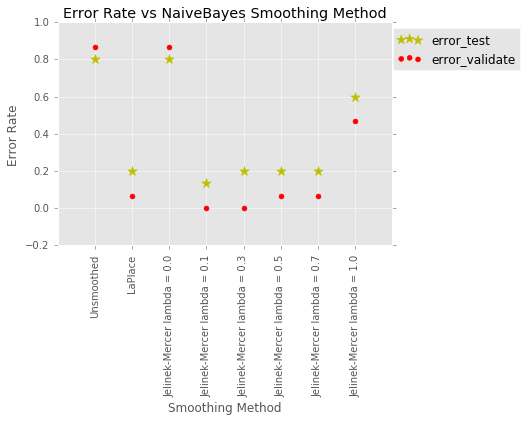

In [85]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot
matplotlib.style.use('ggplot')

indices = 10 * resultsout.index

fig = pyplot.figure()
ax = pyplot.subplot(111)

x = ax.scatter(indices, resultsout.error_test,color='y', marker = '*', s=100)
y = ax.scatter(indices, resultsout.error_validate,color='r', marker = '.', s=100)
pyplot.xticks(indices, resultsout.name, rotation=90)
pyplot.ylabel('Error Rate')
pyplot.xlabel('Smoothing Method')
pyplot.title('Error Rate vs NaiveBayes Smoothing Method')
pyplot.legend(bbox_to_anchor=(1.4, 1), loc='best', ncol=1)

#### Based on the graph above, when given the validation data set, the Jelinek-Mercer lambda = .1 or lambda = .3 work equally as well (this is confirmed by looking at the data table).  When applied to the unseen test set, the lamdba = .1 worked the best.

# HW1.5: Remove words with frequency of less than three (3) in the training set

Repeat HW1.4. This time when modeling and classification ignore tokens with a frequency of less than three (3) in the training set. How does it affect the misclassifcation error of learnt naive multinomial Bayesian Classifier on the training dataset. Report the error and the change in error. HINT: ignore tokens with a frequency of less than three (3). Think of this as a preprocessing step. How many new mapreduce jobs do you need to solve thus homework? 

In [86]:
%%writefile NaiveBayesTrainerLess3HW1.py

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
 
from collections import defaultdict
 
from mrjob.job import MRJob
from mrjob.job import MRStep

import re, string

line_counts = dict()
word_counts = dict()

class NaiveBayesTrainerLess3(MRJob):
 
    def __init__(self, *args, **kwargs):
        super(NaiveBayesTrainerLess3, self).__init__(*args, **kwargs)
        
    def jobconf(self):
        orig_jobconf = super(NaiveBayesTrainerLess3, self).jobconf()        
        custom_jobconf = {
            'mapred.reduce.tasks': '1',
        }
        combined_jobconf = orig_jobconf
        combined_jobconf.update(custom_jobconf)
        self.jobconf = combined_jobconf
        return combined_jobconf
    
     
    def configure_options(self):
        super(NaiveBayesTrainerLess3, self).configure_options()
        self.add_passthrough_option(
            '--smoothmethod', default='nosmooth', choices=['nosmooth', 'laplace', 'jelinekmercer']
        )
        
        self.add_passthrough_option(
            '--jmlambda', default=0.3, dest='jmlambda', type='float'
        )
        
    def steps(self):
        out = [
            MRStep(
                mapper = self.mapper,
                combiner = self.combiner,
                reducer = self.reducer_pre
            )
        ]
        
        if self.options.smoothmethod == 'laplace': 
            out.append(MRStep(
                reducer = self.reducer_laplace
            ))
        
        elif self.options.smoothmethod == 'jelinekmercer':
            out.append(MRStep(
                reducer = self.reducer_jelinekmercer
            ))
            
        else:
            out.append(MRStep(
                reducer = self.reducer_nosmooth
            ))
        
        return out
 
    def mapper(self, _, line):
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        _, classifier, token = line.strip().split('\t', 2)
        token = regex.sub(' ', token.lower())
        token = re.sub( '\s+', ' ', token )
        words = token.split()
        yield (('line', classifier), 1)
 
        for word in set(words):                
            yield ((word, classifier), words.count(word))
            yield (('word', classifier), words.count(word))
 
 
    def combiner(self, word_classifier, counts):
        yield (word_classifier, sum(counts))
 
    def reducer_pre(self, word_classifier, counts):
        total_count = sum(counts)
        word, classifier = word_classifier

        if word == 'word':
            if classifier not in word_counts:
                word_counts[classifier] = 0
                
            word_counts[classifier] += total_count
            return

        if word == 'line':
            line_counts[classifier] = total_count
            word = 'PriorProb'

        if total_count <= 3:

            if classifier not in word_counts:
                word_counts[classifier] = 0
            word_counts[classifier] -= total_count
        else:
            yield (word, {classifier: total_count})
            
    def reducer_nosmooth(self, word, classified_counts):
        combined = defaultdict(lambda: 0)

        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count

        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)
 
            if word == 'PriorProb':
                probability = count / sum(line_counts.values())
            else:
                probability = count / word_counts[classifier]
 
            yield (word, classifier), probability
    
    def reducer_laplace(self, word, classified_counts):
        combined = defaultdict(lambda: 0)
        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count
 
        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)
 
            if word == 'PriorProb':
                probability = count / sum(line_counts.values())
            else:
                probability = (count + 1) / (word_counts[classifier]+ 1)
 
            yield (word, classifier), probability
    
    def reducer_jelinekmercer(self, word, classified_counts):
        combined = defaultdict(lambda: 0)
        
        for entry in classified_counts:
            for classifier, count in entry.items():
                combined[classifier] += count
 
        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)

        for classifier in line_counts.keys():
            count = combined.get(classifier, 0)
            jmlambda = self.options.jmlambda
        
            if word == 'PriorProb':
                probability = count / sum(line_counts.values())
            else:
                probability = (
                    (1 - jmlambda) * (count / word_counts[classifier]) +
                    (jmlambda * sum(combined.values()) / sum(word_counts.values()))
                )
                
            yield (word, classifier), probability 

if __name__ == '__main__':
    NaiveBayesTrainerLess3.run()

Overwriting NaiveBayesTrainerLess3HW1.py


In [87]:
%reload_ext autoreload
%autoreload 2

import NaiveBayesTrainerLess3HW1 as nbTrainerL3 

def modelL3(trainer, modelfile, smoothing_type='none', jmlambda=0.3):
    nbTrainerL3.word_counts = dict()
    nbTrainerL3.line_counts = dict()
    mr_job = nbTrainerL3.NaiveBayesTrainerLess3(
        args=[
            trainer,
            '--smoothmethod={}'.format(smoothing_type),
            '--jmlambda={}'.format(jmlambda)
        ]
    )
    modelStats = dict()
    
    with mr_job.make_runner() as runner: 
        runner.run()
        
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            word = key[0]
            classifier = int(key[1])

            if word not in modelStats:
                probs = ['0', '0']
                probs[classifier] = str(value)
                modelStats[word] = probs                        
            else:
                modelStats[word][classifier] = str(value)

        # Store model locally
        with open(modelfile, 'w') as f:
            for word, probs in modelStats.items():
                f.writelines(word + "\t" + "\t".join(probs) + "\n")

In [89]:
modelL3(    
    trainer='enron_trainer.txt',
    smoothing_type='nosmooth',
    modelfile='enron_model_unsmoothed.txt'
)

In [90]:
%%writefile NaiveBayesLess3HW1.py
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from mrjob.job import MRJob
from mrjob.step import MRStep
import os, re, string, math

counts = []

class NaiveBayesClassifierL3(MRJob):

    def __init__(self, *args, **kwargs):
        super(NaiveBayesClassifierL3, self).__init__(*args, **kwargs)
        
    def steps(self):
        return [
            MRStep(
                mapper_init=self.mapper_init, 
                mapper=self.mapper,
                combiner=self.combiner,
                reducer=self.reducer  
            ),
            MRStep(reducer=self.reducer_final)
        ]

    def configure_options(self):
        super(NaiveBayesClassifierL3, self).configure_options()
        
        self.add_file_option('--model')
        
    def mapper_init(self): 
        self.model_stats = {}

        with open(self.options.model, "r") as f:
            lines = f.read().split('\n')
        
        split_lines = [line.split('\t') for line in lines]
        
        for entry in split_lines:
            word = entry[0]
            probs = [float(p) for p in entry[1:]]
            self.model_stats[word] = probs
    
    def mapper(self, _, line):
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        _, classifier, token = line.strip().split('\t', 2)
        token = regex.sub(' ', token.lower())
        token = re.sub( '\s+', ' ', token )

        p0 = math.log10(self.model_stats['PriorProb'][0])
        p1 = math.log10(self.model_stats['PriorProb'][1])
        
        for word in token.split():

            probs = self.model_stats.get(word, [0, 0]) 
            probs = [p if p > 0 else 1 for p in probs] 
           
            p0 += math.log10(probs[0])
            p1 += math.log10(probs[1])

        if p0 > p1:
            prediction = 0
        elif p1 > p0:
            prediction = 1
        else:
            prediction = -1 

        if prediction == int(classifier):
            key = 'correct'
        else:
            key = 'incorrect'
            
        yield (key, 1)

    def combiner(self, key, values):
        yield (key, sum(values))
        
    def reducer(self, key, values):
        values = list(values)
        count = sum(values)
        counts.append(count)
        yield (key, count)
      
    def reducer_final(self, key, values):
        values = list(values)

        rate = sum(values) / sum(counts)
        output = 'Inaccuracy Rate' if key == 'incorrect' else 'Accuracy Rate'
        
        yield (output, rate)

if __name__ == '__main__':
    NaiveBayesClassifierL3.run()

Writing NaiveBayesLess3HW1.py


In [91]:
%reload_ext autoreload
%autoreload 2

import os
import NaiveBayesLess3HW1 as nbClassifierL3


def classifyL3(smoothtype, valer, modelfile):
    model_path = os.path.join(
        os.path.abspath(os.path.curdir), 
        modelfile
    )
    nbClassifierL3.counts = []
    mr_job = nbClassifierL3.NaiveBayesClassifierL3(
        args=[
            valer,
            '--model={}'.format(modelfile)
        ]
    )
    out = {'Smooth Method': smoothtype, 'Inaccuracy Rate': 0, 'Accuracy Rate': 0}
    
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            key, value =  mr_job.parse_output_line(line)
            out[key] = value
                
    return out

In [231]:
import pandas

testing_filename = 'enron_tester.txt'
validation_filename = 'enron_valer.txt'
model_filename = 'enron_model_trial.txt'
L3results = []

def modelcompareL3(smoothtype, smoothing_type, jmlambda=0.3):

    modelL3(    
        trainer='enron_trainer.txt',
        smoothing_type=smoothing_type,
        modelfile=model_filename,
        jmlambda=jmlambda
    )
    
    out = {'SmoothType': smoothtype}
    
    resultsL3 = classifyL3(smoothtype, testing_filename, model_filename)
    out['Training Error'] = resultsL3['Inaccuracy Rate']
    
    resultsL3 = classifyL3(smoothtype, testing_filename, model_filename)
    out['Test Error'] = resultsL3['Inaccuracy Rate']
    
    resultsL3 = classifyL3(smoothtype, validation_filename, model_filename)
    out['Validation Error'] = resultsL3['Inaccuracy Rate']
    
    return out

In [232]:
L3results.append(modelcompareL3('Unsmoothed', 'nosmooth'))
L3results.append(modelcompareL3('LaPlace', 'laplace'))
L3results.append(modelcompareL3('JM lambda = 0.0', 'jelinekmercer', jmlambda=0.0))
L3results.append(modelcompareL3('JM lambda = 0.1', 'jelinekmercer', jmlambda=0.1))
L3results.append(modelcompareL3('JM lambda = 0.3', 'jelinekmercer', jmlambda=0.3))
L3results.append(modelcompareL3('JM lambda = 0.5', 'jelinekmercer', jmlambda=0.5))
L3results.append(modelcompareL3('JM lambda = 0.7', 'jelinekmercer', jmlambda=0.7))
L3results.append(modelcompareL3('JM lambda = 1.0', 'jelinekmercer', jmlambda=1.0))

L3resultsout = pandas.DataFrame(L3results)
del L3resultsout['Training Error']
from IPython.display import display
display(L3resultsout)

,SmoothType,Test Error,Validation Error
0,Unsmoothed,0.733333,0.666667
1,LaPlace,0.200000,0.066667
2,JM lambda = 0.0,0.733333,0.666667
3,JM lambda = 0.1,0.200000,0.200000
4,JM lambda = 0.3,0.200000,0.133333
5,JM lambda = 0.5,0.200000,0.133333
6,JM lambda = 0.7,0.200000,0.133333
7,JM lambda = 1.0,0.600000,0.466667


#### On the test set, the Unsmoothed and the JM lambda = 0 saw a decrease in error rate, with JM Lambda = .1 having an increase.   For the validation set, Unsmoothed and JM lambda = 0 saw decreases, but lambda > 0 all saw increases in error rate.

# HW1.6 Benchmark your code with the Python SciKit-Learn implementation of the multinomial Naive Bayes algorithm

## HW1.6.0: Multinomial Naive Bayes using SciKit-Learn

It always a good idea to benchmark your solutions against publicly available libraries such as SciKit-Learn, The Machine Learning toolkit available in Python. In this exercise, we benchmark ourselves against the SciKit-Learn implementation of multinomial Naive Bayes.  For more information on this implementation see: http://scikit-learn.org/stable/modules/naive_bayes.html more  

In this exercise, please complete the following:

— Run the Multinomial Naive Bayes algorithm (using default settings) from SciKit-Learn over the same training data used in HW1.4.2 and report the misclassification error (please note some data preparation might be needed to get the Multinomial Naive Bayes algorithm from SkiKit-Learn to run over this dataset)
- Prepare a table to present your results, where rows correspond to approach used (SkiKit-Learn versus your Hadoop implementation) and the column presents the  misclassification error rates (train, validation, testing)
— Explain/justify any differences in terms of training error rates over the dataset in HW1.5 between your Multinomial Naive Bayes implementation (in Map Reduce) versus the Multinomial Naive Bayes implementation in SciKit-Learn 


In [221]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import *

import csv
import numpy as np


with open('enron_trainer.txt', 'r') as ftrain:
    reader = csv.reader(ftrain, delimiter="\t")
    emails = list(reader)
train_label = [msg[1] for msg in emails]
train_data = [msg[2] + msg[3] if len(msg) == 4 else msg[2] for msg in emails]
msg_id = [msg[0].lower() for msg in emails]
# print(train_label, train_data, msg_id)

# feature vectorization
uniVectorizer = CountVectorizer()
dtmTrain = uniVectorizer.fit_transform(train_data) 
# print(uniVectorizer, dtmTrain)

# multinomial Naive Bayes Classifier from sklearn
mnb = MultinomialNB()
mnb.fit(dtmTrain, train_label)
pred_mnb = mnb.predict(dtmTrain)
training_error_mnb = 1.0 * sum(pred_mnb != train_label) / len(train_label)

# Bernoulli Naive Bayes Classifier from sklearn
bnb = BernoulliNB()
bnb.fit(dtmTrain, train_label)
pred_bnb = bnb.predict(dtmTrain)
training_error_bnb = 1.0*sum(pred_bnb != train_label) / len(train_label)



with open('enron_tester.txt', 'r') as ftest:
    reader = csv.reader(ftest, delimiter="\t")
    emails = list(reader)
test_label = [msg[1] for msg in emails]
test_data = [msg[2] + msg[3] if len(msg) == 4 else msg[2] for msg in emails]
msg_id = [msg[0].lower() for msg in emails]
# print(train_label, train_data, msg_id)

# feature vectorization
uniVectorizer = CountVectorizer()
dtmTest = uniVectorizer.fit_transform(test_data) 
# print(uniVectorizer, dtmTrain)

# multinomial Naive Bayes Classifier from sklearn
mnb = MultinomialNB()
mnb.fit(dtmTest, test_label)
pred_mnb = mnb.predict(dtmTest)
testing_error_mnb = 1.0 * sum(pred_mnb != test_label) / len(test_label)

# Bernoulli Naive Bayes Classifier from sklearn
bnb = BernoulliNB()
bnb.fit(dtmTest, test_label)
pred_bnb = bnb.predict(dtmTest)
testing_error_bnb = 1.0*sum(pred_bnb != test_label) / len(test_label)



with open('enron_valer.txt', 'r') as fval:
    reader = csv.reader(fval, delimiter="\t")
    emails = list(reader)
val_label = [msg[1] for msg in emails]
val_data = [msg[2] + msg[3] if len(msg) == 4 else msg[2] for msg in emails]
msg_id = [msg[0].lower() for msg in emails]
# print(train_label, train_data, msg_id)

# feature vectorization
uniVectorizer = CountVectorizer()
dtmVal = uniVectorizer.fit_transform(val_data) 
# print(uniVectorizer, dtmTrain)

# multinomial Naive Bayes Classifier from sklearn
mnb = MultinomialNB()
mnb.fit(dtmVal, val_label)
pred_mnb = mnb.predict(dtmVal)
val_error_mnb = 1.0 * sum(pred_mnb != val_label) / len(val_label)

# Bernoulli Naive Bayes Classifier from sklearn
bnb = BernoulliNB()
bnb.fit(dtmVal, val_label)
pred_bnb = bnb.predict(dtmVal)
val_error_bnb = 1.0*sum(pred_bnb != val_label) / len(val_label)


In [233]:
import pandas

validation_filename = 'enron_valer.txt'
model_filename = 'enron_model_trial.txt'
resultsscikit = []

def modelcomparescikit(smoothtype, smoothing_type, jmlambda=0.3):

    model(    
        trainer='enron_trainer.txt',
        smoothing_type=smoothing_type,
        modelfile=model_filename,
        jmlambda=jmlambda
    )
    
    out = {'SmoothType': smoothtype}
    
    resultsscikit = classify(smoothtype, validation_filename, model_filename)
    out['Training Error'] = resultsL3['Inaccuracy Rate']
    
    resultsscikit = classify(smoothtype, validation_filename, model_filename)
    out['Test Error'] = resultsL3['Inaccuracy Rate']
    
    resultsscikit = classify(smoothtype, validation_filename, model_filename)
    out['Validation Error'] = resultsL3['Inaccuracy Rate']
    
    return out

In [234]:

resultsscikit.append(modelcompareL3('Unsmoothed', 'nosmooth'))
resultsscikit.append(modelcompareL3('LaPlace', 'laplace'))
resultsscikit.append(modelcompareL3('JM lambda = 0.0', 'jelinekmercer', jmlambda=0.0))
resultsscikit.append(modelcompareL3('JM lambda = 0.1', 'jelinekmercer', jmlambda=0.1))
resultsscikit.append(modelcompareL3('JM lambda = 0.3', 'jelinekmercer', jmlambda=0.3))
resultsscikit.append(modelcompareL3('JM lambda = 0.5', 'jelinekmercer', jmlambda=0.5))
resultsscikit.append(modelcompareL3('JM lambda = 0.7', 'jelinekmercer', jmlambda=0.7))
resultsscikit.append(modelcompareL3('JM lambda = 1.0', 'jelinekmercer', jmlambda=1.0))
resultsscikit.append({'SmoothType': 'Sci-Kit Binomial', 'Validation Error': val_error_bnb,
                      'Test Error': testing_error_bnb, 'Training Error': training_error_bnb})
resultsscikit.append({'SmoothType': 'Sci-Kit Multinomial', 'Validation Error': val_error_mnb,
                      'Test Error': testing_error_mnb, 'Training Error': training_error_mnb})

resultsscikitout = pandas.DataFrame(resultsscikit)


from IPython.display import display
display(resultsscikitout)

,SmoothType,Test Error,Training Error,Validation Error
0,Unsmoothed,0.733333,0.733333,0.666667
1,LaPlace,0.200000,0.200000,0.066667
2,JM lambda = 0.0,0.733333,0.733333,0.666667
3,JM lambda = 0.1,0.200000,0.200000,0.200000
4,JM lambda = 0.3,0.200000,0.200000,0.133333
5,JM lambda = 0.5,0.200000,0.200000,0.133333
6,JM lambda = 0.7,0.200000,0.200000,0.133333
7,JM lambda = 1.0,0.600000,0.600000,0.466667
8,Sci-Kit Binomial,0.200000,0.157143,0.333333
9,Sci-Kit Multinomial,0.066667,0.000000,0.000000
